# Cycle 1 - Introduction to neural networks - MLFlow example

## Rodolphe Cledassou school 2023

> Alexandre Boucaud

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp

import seaborn
import matplotlib.pyplot as plt

tfd = tfp.distributions
tfpl = tfp.layers
tfk = tf.keras
tfkl = tf.keras.layers

seaborn.set_theme(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1.2, rc={"lines.linewidth": 2})

## Let's first generate some data...

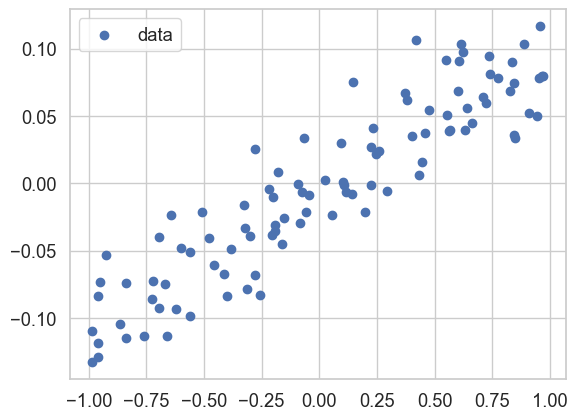

In [2]:
x = np.random.uniform(-1, 1, 100)
y = 0.1 * x + np.random.normal(0, 0.025, 100)
plt.scatter(x, y, label="data")
plt.legend()
plt.show()

## Now, let's write a linear regression with a neural network

In [3]:
ann = tfk.Sequential([
    tfkl.Dense(1, input_dim=1, activation=None)
])

The Dense command here, onnly says that the input is multiplied by a parameter $w$. We are effectively writing a simple model for our data: $y = w.a+b$, where $w$ is unknown.
![alt](https://drive.google.com/uc?id=1Rt2bNPCxaHXdjzmVS7TCw_u_Ur-WIqlW)

We can visualize the model we just created.

In [4]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### We then compile

In [5]:
ann.compile(optimizer=tf.optimizers.Adam(), loss="mse")

We are simply tht we want to minimize the mean square error (mse) between input and output. We call this the "loss function". So we are looking for the value of $w$ that minimizes the following expression: $$\sum_i(y_i-w.x_i)^2$$

### And fit the model ...

In [6]:
# you might need to run this cell a couple of times if it does not work directly
history = ann.fit(x, y, batch_size=1, epochs=50, verbose=0)

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

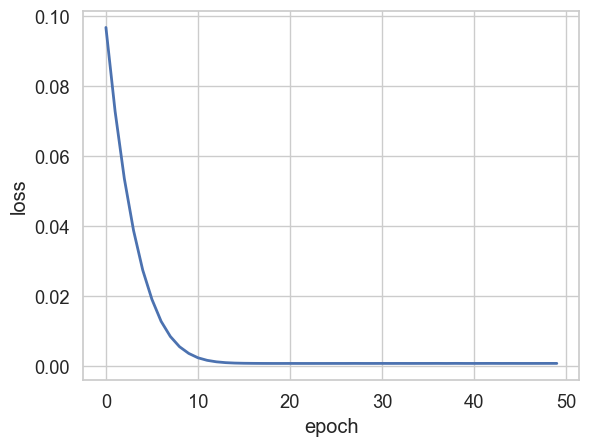

In [7]:
plt.plot(history.epoch, history.history["loss"])
plt.xlabel("epoch"), plt.ylabel("loss")

### Let's see what we got here...

2/2 [==============================] - 0s 1ms/step


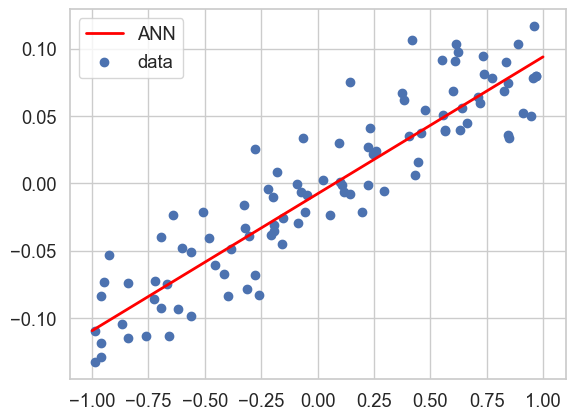

In [9]:
x_plot = np.linspace(-1, 1)
plt.plot(x_plot, ann.predict(x_plot), color="red", label="ANN")
plt.scatter(x, y, label="data")
plt.legend()

We have performed a linear regression with and artifical neural network ! So, yes, linear regression IS also Machine Learning...

## How can we record this example in MLFlow ?

First we combine into one cell the full execution from above

2/2 [==============================] - 0s 840us/step


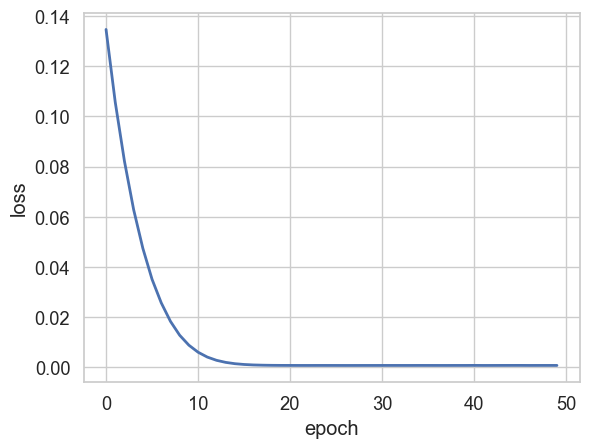

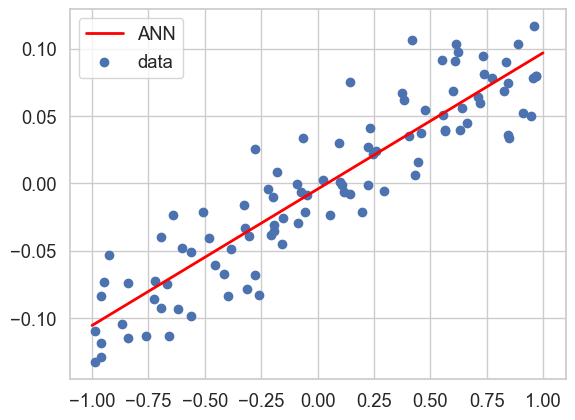

In [11]:
# creation of the model
model = tfk.Sequential([tfkl.Dense(1, input_dim=1, activation=None)])
model.compile(optimizer=tf.optimizers.Adam(lr=0.001), loss="mse")

# model training
history = model.fit(x, y, batch_size=1, epochs=50, verbose=0)

# training loss
plt.figure()
plt.plot(history.epoch, history.history["loss"])
plt.xlabel("epoch"), plt.ylabel("loss")

# result plot
x_plot = np.linspace(-1, 1)
plt.figure()
plt.plot(x_plot, model.predict(x_plot), color="red", label="ANN")
plt.scatter(x, y, label="data")
plt.legend()

We will put all the recorded runs under the experiment "Euclid school 2023"

In [12]:
import mlflow

mlflow.set_experiment("Euclid school 2023")

2023/08/24 19:45:49 INFO mlflow.tracking.fluent: Experiment with name 'Euclid school 2023' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///Users/aboucaud/tutorials/euclid-school/2023/notebooks/mlruns/632550140674078352', creation_time=1692899149298, experiment_id='632550140674078352', last_update_time=1692899149298, lifecycle_stage='active', name='Euclid school 2023', tags={}>

Then we rewrite the previous code with `mlflow` indications of when the recording starts and what to log

2023/08/24 19:51:00 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /var/folders/19/jwzphgd14_ldbmfxmnbf8hxr0000gq/T/tmp7phhz8yh/model/data/model/assets


INFO:tensorflow:Assets written to: /var/folders/19/jwzphgd14_ldbmfxmnbf8hxr0000gq/T/tmp7phhz8yh/model/data/model/assets


2/2 [==============================] - 0s 2ms/step


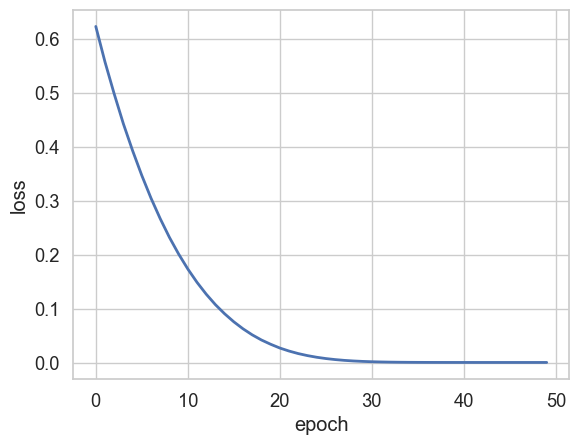

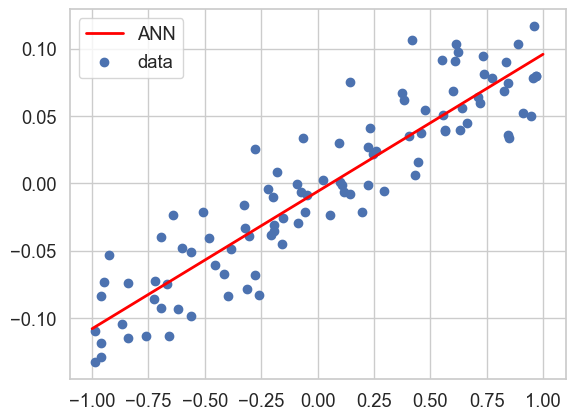

In [21]:
with mlflow.start_run():

    model = tfk.Sequential([tfkl.Dense(1, input_dim=1, activation=None)])
    model.compile(optimizer=tf.optimizers.Adam(lr=0.001), loss="mse")

    history = model.fit(x, y, batch_size=1, epochs=50, verbose=0)

    mlflow.tensorflow.log_model(model, artifact_path="linreg")

    # save hyperparameters
    mlflow.log_param('learning_rate', 0.001)
    mlflow.log_param('epochs', 50)

    plt.figure()
    plt.plot(history.epoch, history.history["loss"])
    plt.xlabel("epoch"), plt.ylabel("loss")
    plt.savefig("loss.png")

    x_plot = np.linspace(-1, 1)
    plt.figure()
    plt.plot(x_plot, model.predict(x_plot), color="red", label="ANN")
    plt.scatter(x, y, label="data")
    plt.legend()
    plt.savefig("fit.png")

    # save plots (first written to disk with savevig)
    mlflow.log_artifact("loss.png")
    mlflow.log_artifact("fit.png")

## Exercice : do the same for the more complex data model below

1. create a training and a test dataset
2. evaluate the accuracy after training on the test set
3. log that value in mlflow along with the other parameters `log_metric`
4. then starting changing some parameters to improve the model and log them in mlflow each time `log_param`
    - change the number of neurons in a layer
    - change the number of layers
    - try several activation functions
    - etc.

In [22]:
x = np.random.uniform(-1, 1, 100)
model = lambda x: 0.1 * x + np.sin(5 * x)
y = model(x) + np.random.normal(0, 0.45 * np.abs(x), 100)

## CREATE TRAIN - TEST



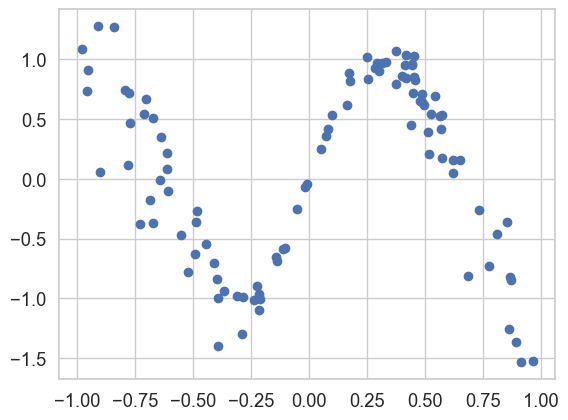

In [23]:
plt.scatter(x, y)
plt.show()

## We can add another layer

In [44]:
ann = tfk.Sequential(
    [
        tfkl.Dense(..., input_dim=1, activation="sigmoid"),
        tfkl.Dense(..., activation="sigmoid"),
        tfkl.Dense(1, activation=None),
    ]
)

In [45]:
ann.compile(optimizer="adam", loss="mse")
history = ann.fit(x, y, batch_size=1, epochs=50, verbose=0)

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

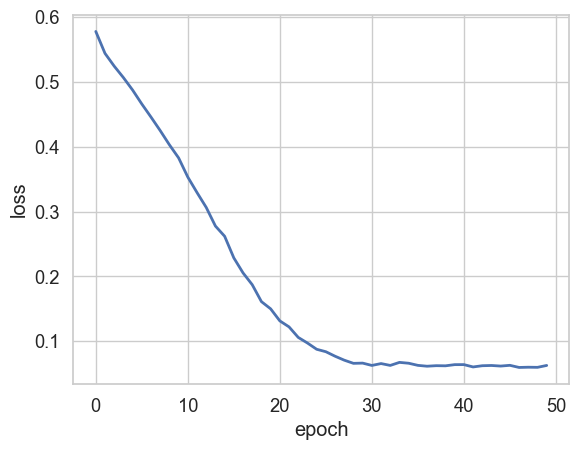

In [46]:
plt.plot(history.epoch, history.history["loss"])
plt.xlabel("epoch"), plt.ylabel("loss")

2/2 [==============================] - 0s 1ms/step


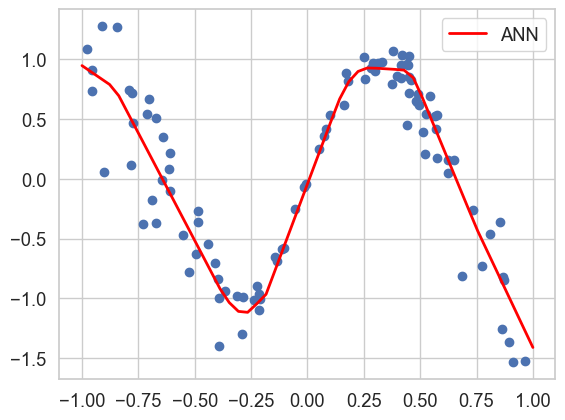

In [47]:
plt.scatter(x, y)
plt.plot(x_plot, ann.predict(x_plot), color="red", label="ANN")
plt.legend()

In [ ]:
## WRITE HERE THE ENTIRE PROCESS IN ONE CELL AND CALL MLFLOW ON IT

